## Esercizio A

Data la matrice
$$
\left[
\begin{array}{cccc}
4.5 & 1 & 3 & 2\\
1 & -8 & 2 & 1\\
-1 & -2 & -3 & -1\\
2 & 6 & 0 & 1
\end{array}
\right ],
$$

calcolarne la fattorizzazione lu di Gauss  facendo uso della funzione scipy.linalg.lu  e sfruttarla per il calcolo del suo determinante e della sua inversa.

In [2]:
import scipy as sp
import scipy.linalg as spl
import numpy as np
import numpy.linalg as npl
import SolveTriangular
import matplotlib.pyplot as plt

In [3]:
A=np.array([[4.5,1,3,2],[1,-8,2,1],[-1,-2,-3,-1],[2,6,0,1]])
P,L,U=spl.lu(A)
#calcolo dei determinanti tramite la formula det(A) = det(P) * det(U), perché det(L) = 1
print(np.linalg.det(U)*np.linalg.det(P), "=", np.linalg.det(A))

#calcolo l'inversa
n,m=A.shape
I=np.eye(n)
#LUX=PI --> da cui il sistema: LY=PI / UX=Y
for i in range(0,4):
    y,flag=SolveTriangular.Lsolve(L,(P@I)[i])
    if flag==0:
        x,flag=SolveTriangular.Usolve(U,y)
    if(i==0):
        invA=x
    else:
        invA=np.concatenate((invA,x),axis=1)
print(invA)
print(np.linalg.inv(A))

57.999999999999986 = 57.999999999999986
[[ 0.5862069  -0.36206897  0.34482759 -0.46551724]
 [-0.01724138 -0.07758621 -0.06896552  0.04310345]
 [ 0.17241379 -0.22413793 -0.31034483 -0.43103448]
 [-1.06896552  1.18965517 -0.27586207  1.67241379]]
[[ 0.5862069  -0.36206897  0.34482759 -0.46551724]
 [-0.01724138 -0.07758621 -0.06896552  0.04310345]
 [ 0.17241379 -0.22413793 -0.31034483 -0.43103448]
 [-1.06896552  1.18965517 -0.27586207  1.67241379]]


## Esercizio  B

Siano assegnati i punti del piano di coordinate $(x_i, y_i)$, $i=1,\ldots,4$ con 
$$
\begin{array}{c}
x_1=0, \quad x_2=4, \quad x_3=0, \quad x_4=5\\
y_1=0, \quad y_2=0, \quad y_3=4, \quad y_4=6.
\end{array}
$$ 
Scrivere lo script Python  in cui
- si costruisca il sistema lineare sovradeterminato ottenuto imponendo il passaggio della circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ per i quattro punti assegnati, e si denotino con ${\bf A}$ e ${\bf b}$ la matrice dei coefficienti e il termine noto ottenuti;   [**punti 2**]

- si sfrutti la decomposizione QR  della matrice A  per ottenere la soluzione ${\bf a}^*$ del problema ai minimi quadrati $\min_{{\bf a} \in \mathbb{R}^3} \|{\bf A}{\bf a}-{\bf b}\|_2^2$  e  si calcoli il valore di $\|{\bf A}{\bf a}^*-{\bf b}\|_2^2$;   [**punti 5**]

-  dopo averne determinato centro e raggio, si rappresentino in una stessa figura la circonferenza di equazione $x^2+y^2+a^*_1x+a^*_2y+a^*_3=0$ (individuata dalla soluzione ${\bf a}^*$ del problema ai minimi quadrati) e i quattro punti assegnati dal problema.[**punti 3**]


**Nota Bene**: Si ricorda che data una circonferenza nella forma canonica
$$ x^2+y^2+a_1 x+a_2 x+a_3=0$$

le coordinate del suo centro sono 
$$C≡(-a_1/2,-a_2/2)$$

e la lunghezza del suo raggio è data da:

$$r=\sqrt{\frac{a_1^2}{4}+\frac{a_2^2}{4} -a_3}$$

e la circoferenza può essere rappresentata in forma parametrica $C(t),  t \in [0, 2 \cdot \pi]$ e le due componenti parametriche sono $$x(t)= C_0+r\cdot cos(t);$$ $$ y(t)= C_1+r\cdot sin(t)$$

In [4]:
A=np.array([[0,0,1],[4,0,1],[0,4,1],[5,6,1]])
b=np.array([[0],[-16],[-16],[-61]])


In [5]:
def qrLS(A,b):
  #Risolve un sistema sovradeterminato con il metodo QR-LS
  n=A.shape[1]  #numero di colonne di A
  Q,R=spl.qr(A)
  h=Q.T@b       #to do
  x,flag=SolveTriangular.Usolve(R[0:n,:],h[0:n])#to do
  residuo=np.linalg.norm(h[n:])**2
  return x,residuo

In [6]:
a,r=qrLS(A,b)
print(a)
#il residuo è uguale alla norma
print(npl.norm((A@a-b),2)**2, "=", r)
C=np.array([-a[0]/2,-a[1]/2])
r=np.sqrt((a[0]**2/4)+(a[1]**2/4)-(a[2]))

[[-5.61904762]
 [-5.75396825]
 [ 3.77777778]]
36.69841269841267 = 36.698412698412916


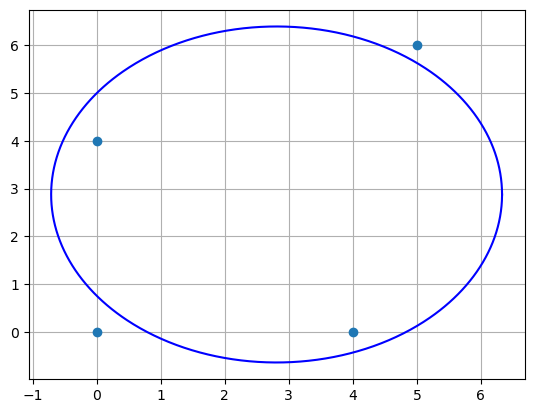

In [7]:
t=np.linspace(0,2*np.pi,1000)
x=C[0]+np.cos(t)*r
y=C[1]+np.sin(t)*r
coord_x=np.array([0,4,0,5])
coord_y=np.array([0,0,4,6])
plt.plot(x,y,'b-',coord_x, coord_y,'o')
plt.grid(True)
plt.show()

## Esercizio C
Per i dati $(x_i, y_i)$ riportati nei seguenti array

x = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013]) 

y = np.array([0.0007,0.0162, 0.0288, 0.0309, 0.0310])

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;
- determinare l'approssimazione ai minimi quadrati espressa in termini di
basi esponenziali: $y = a + b e^{-x}+ c e^{-2x}$

Quale tra le tre approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).

In [8]:
def eqnorm(A,b):
#Risolve un sistema sovradeterminato con il metodo delle equazioni normali
  G=A.T@A
  f=A.T@b 
    
  L=spl.cholesky(G,lower=True)
  U=L.T
        
  z,flag=SolveTriangular.Lsolve(L,f)
  if flag==0:
    x,flag=SolveTriangular.Usolve(U,z)

  return x

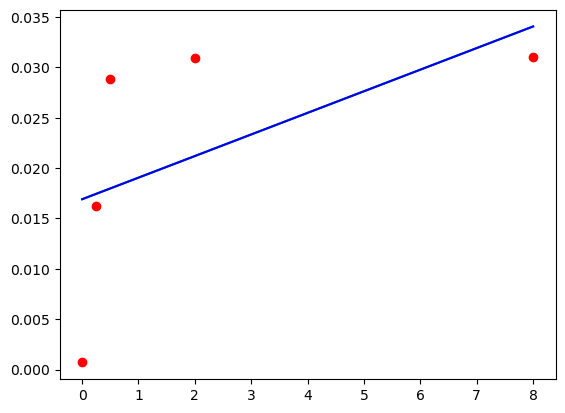

In [9]:
x = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013]) 
y = np.array([0.0007,0.0162, 0.0288, 0.0309, 0.0310])

n=1     #grado 1 = retta
n1=n+1

B=np.vander(x,increasing=True)[:,:n1]
alpha=eqnorm(B,y)

xx=np.linspace(np.min(x),np.max(x),200)
retta=np.polyval(np.flip(alpha),xx)
plt.plot(x,y,'ro')
plt.plot(xx,retta,'-g')

n=2     #grado 1 = retta
n1=n+1

B=np.vander(x,increasing=True)[:,:n1]
alpha2=eqnorm(B,y)

xx=np.linspace(np.min(x),np.max(x),200)
parabola=np.polyval(np.flip(alpha2),xx)
plt.plot(xx,retta,'-b')
plt.show()

# Esercizio D

La temperatura T in prossimita' del suolo varia al variare della concentrazione k dell'acido carbonico e della latitudine L. Per k=1.5 la temperatura al suolo subisce una variazione dipendente dalla latitudine secondo la seguente tabella 

L	[-55	-45	-35	-25	-15	-5	5	15	25	35	45	55	65]

T	[3.7	3.7	3.52	3.27	3.2	3.15	3.15	3.25	3.47	3.52	3.65	3.67	3.52]

Si vuole costruire un MODELLO che descriva la legge T=T(L) anche per latitudini non misurate. 
Ad esempio si vuole valutare la variazione di temperatura a Londra ( L=51°).
mediante interpolazione con un polinomio di grado 12.
Valutare e disegnare, inoltre, il polinomio interpolatore di Lagrange in un set di 100 dati equidistanti nell’intervallo min(L), max(L).
Descrivere i risultati alla luce della teoria.

In [10]:
def plagr(xnodi,j):
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
      xzeri=xnodi[1:n]
    else:
      xzeri=np.append(xnodi[0:j],xnodi[j+1:n])
    num=np.poly(xzeri)  #to do
    den=np.polyval(num, xnodi[j])  #to do
    p=num/den
    return p

In [11]:
def InterpL(x, y, xx):
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     for j in range(n):
        p=plagr(x,j)            #to do
        L[:,j]=np.polyval(p,xx) #to do
     return L@y

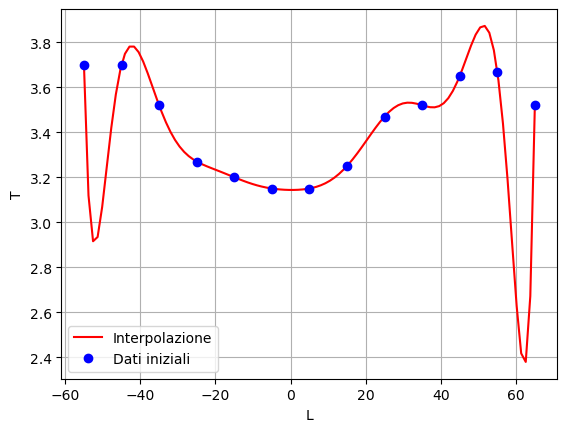

In [12]:
L=np.array([-55,-45,-35,-25,-15,-5,5,15,25,35,45,55,65])
T=np.array([3.7,3.7,3.52,3.27,3.2,3.15,3.15,3.25,3.47,3.52,3.65,3.67,3.52])

xx=np.linspace(np.min(L),np.max(L),100)
polLagr=InterpL(L,T,xx)
plt.plot(xx,polLagr,'r-',label='Interpolazione')
plt.plot(L, T,'bo', label='Dati iniziali')
plt.xlabel('L')
plt.ylabel('T')
plt.legend()
plt.grid(True)
plt.show()


## Esercizio E

-  Implementare il  metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema non lineare

Risolvere il sistema di equazioni non lineare 

$$
\left[
\begin{array}{c}
x_0^2+x_0x_1=10 \\
 x_1+3x_0x_1^2=57
\end{array}
\right.
$$
con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria.

- Descrivi la variante del Metodod di Newton-Raphson per calcolare il minimo di una funzione non lineare in più variabili

 

**Nota Bene**: Servirsi del metodo grafico per individuare un 
iterato iniziale  $X_0$ nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici z = f1 (x1 ,x2 ) e z = f2(x1 , x 2 ) e 
definire come iterato iniziale un vettore $X_0$ oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) \]